# Python data structures demo

## Text analysis and generation

In [1]:
import urllib.request

md_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
md_text = urllib.request.urlopen(md_url).read().decode()

In [2]:
md_text[:100]

'\ufeffThe Project Gutenberg eBook of Moby-Dick; or The Whale, by Herman Melville\r\n\r\nThis eBook is for the'

In [4]:
idx = md_text.index('Call me Ishmael')
idx

28842

In [5]:
md_text[idx:idx+100]

'Call me Ishmael. Some years ago—never mind how long precisely—having\r\nlittle or no money in my purse'

In [6]:
md_text[idx:idx+100].split()

['Call',
 'me',
 'Ishmael.',
 'Some',
 'years',
 'ago—never',
 'mind',
 'how',
 'long',
 'precisely—having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse']

In [7]:
md_words = md_text.lower().split()

In [8]:
len(md_words)

215864

In [9]:
md_words_uniq = set(md_words)
len(md_words_uniq)

31821

In [15]:
# compute the frequency of each word in the text
md_word_counts = {}
for w in md_words:
    try:
        md_word_counts[w] += 1
    except KeyError:
        md_word_counts[w] = 1

In [11]:
md_word_counts['the']

14511

In [12]:
len(md_word_counts)

31821

In [13]:
# recall: `items` returns a list of key-value tuples
list(md_word_counts.items())[:10]

[('\ufeffthe', 1),
 ('project', 87),
 ('gutenberg', 25),
 ('ebook', 8),
 ('of', 6683),
 ('moby-dick;', 5),
 ('or', 775),
 ('the', 14511),
 ('whale,', 212),
 ('by', 1177)]

In [16]:
# sort the tuples by frequency
md_word_counts_sorted = sorted(md_word_counts.items())

In [17]:
md_word_counts_sorted[:10]

[('"defects,"', 1),
 ('"information', 1),
 ('"plain', 2),
 ('"project', 5),
 ('"right', 1),
 ('#2701]', 1),
 ('$20,000,000!', 1),
 ('$5,000)', 1),
 ('$7,000,000.', 1),
 ('&', 2)]

In [18]:
# load stopwords to eliminate from the word counts
sw_url = 'https://moss.cs.iit.edu/stopwords.txt'
sw_text = urllib.request.urlopen(sw_url).read().decode()
stopwords = sw_text.split()

In [19]:
len(stopwords)

174

In [20]:
stopwords[::10]

['a',
 'any',
 'below',
 "didn't",
 'for',
 'he',
 'himself',
 'in',
 'more',
 'on',
 'over',
 'so',
 'themselves',
 'this',
 "wasn't",
 'when',
 "why's",
 'your']

In [24]:
# remove stopwords
for sw in stopwords:
    try: del md_word_counts[sw]
    except KeyError: pass
    
len(md_word_counts)

31698

In [22]:
md_word_counts_sorted = sorted(md_word_counts.items(),
                               key=lambda t: t[1],
                               reverse=True)

In [23]:
md_word_counts_sorted[:10]

[('one', 782),
 ('like', 564),
 ('upon', 558),
 ('whale', 532),
 ('now', 501),
 ('old', 426),
 ('will', 358),
 ('though', 311),
 ('chapter', 296),
 ('great', 294)]

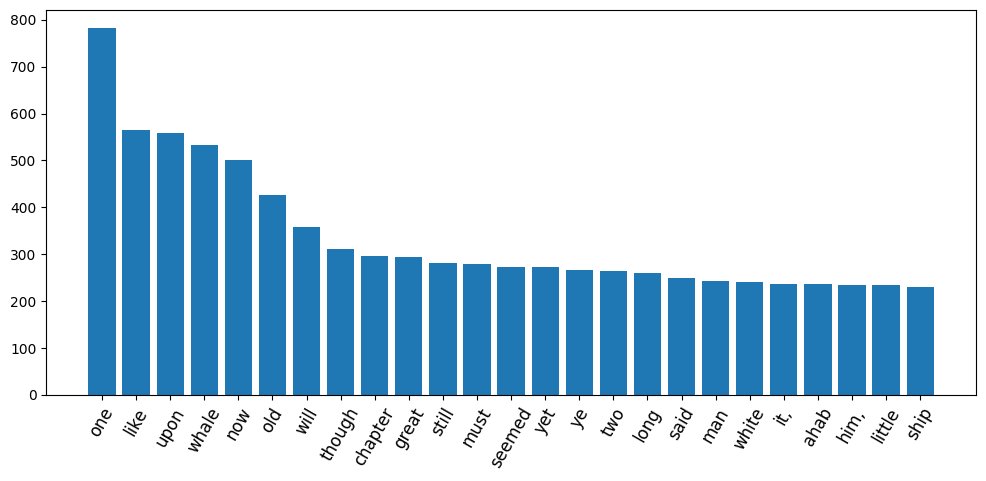

In [27]:
# plot a histogram of the top 25 words

import matplotlib.pyplot as plt

# need lists of the first n words/counts to plot
n = 25
words  = [ md_word_counts_sorted[i][0] for i in range(n) ]
counts = [ md_word_counts_sorted[i][1] for i in range(n) ]

plt.rcParams['figure.figsize'] = [12, 5]
plt.bar(range(n), counts)
plt.xticks(range(n), words, rotation=60, fontsize=12)
plt.show()

In [53]:
# collect all two-word phrases (2-grams) as lists
from typing import List

def collect_n_grams(n: int, source: List[str]) -> List[List[str]]:
    """Return list of n-grams (represented as lists of n length)."""
    numbered = range(len(md_words) - n)
    
    return [source[i:i+n] for i in numbered]

phrases_2 = collect_n_grams(2, md_words)
phrases_4 = collect_n_grams(4, md_words)

pp(phrases_2[:10])
pp(phrases_4[:10])

[['\ufeffthe', 'project'],
 ['project', 'gutenberg'],
 ['gutenberg', 'ebook'],
 ['ebook', 'of'],
 ['of', 'moby-dick;'],
 ['moby-dick;', 'or'],
 ['or', 'the'],
 ['the', 'whale,'],
 ['whale,', 'by'],
 ['by', 'herman']]
[['\ufeffthe', 'project', 'gutenberg', 'ebook'],
 ['project', 'gutenberg', 'ebook', 'of'],
 ['gutenberg', 'ebook', 'of', 'moby-dick;'],
 ['ebook', 'of', 'moby-dick;', 'or'],
 ['of', 'moby-dick;', 'or', 'the'],
 ['moby-dick;', 'or', 'the', 'whale,'],
 ['or', 'the', 'whale,', 'by'],
 ['the', 'whale,', 'by', 'herman'],
 ['whale,', 'by', 'herman', 'melville'],
 ['by', 'herman', 'melville', 'this']]


In [73]:
# map each word to a list of all the words that
# follow it in the text
phrase_2_dict = {}
for w1, w2 in phrases_2:
    try:
        phrase_2_dict[w1].append(w2)
    except KeyError:
        phrase_2_dict[w1] = [w2]

phrase_2_dict['whale'][:10]

['author:',
 '***',
 'as',
 'watch.',
 'statements,',
 'or',
 'to',
 'is',
 'can’t',
 'taken']

In [68]:
# generate a sentence based on two-word phrase statistics from Moby Dick
import random

gen_words = ['whale']
while len(gen_words) < 17:
    w = gen_words[-1]
    gen_words.append(random.choice(phrase_2_dict[w]))

' '.join(gen_words)

'whale is the toil. so far successful fugitive finds no compass at any of flame we must'

In [72]:
from typing import Dict, Tuple

phrase_4_dict: Dict[str, Tuple[str, str, str]] = {}

for p in phrases_4:
    w, *rest = p
    
    try:
        phrase_4_dict[w].append(rest)
    except KeyError:
        phrase_4_dict[w] = [rest]
        
phrase_4_dict['whale'][:10]

[['author:', 'herman', 'melville'],
 ['***', 'moby-dick;', 'or,'],
 ['as', 'a', 'dish.'],
 ['watch.', 'chapter', '118.'],
 ['statements,', 'however', 'authentic,'],
 ['or', 'ork', 'we'],
 ['to', 'shore', 'flies'],
 ['is', 'floating', 'at'],
 ['can’t', 'open', 'his'],
 ['taken', 'near', 'shetland,']]

In [69]:
# generate a sentence based on two-word phrase statistics from Moby Dick
gen_4_words = ['whale']
while len(gen_4_words) < 17:
    w = gen_4_words[-1]
    gen_4_words.extend(random.choice(phrase_4_dict[w]))

' '.join(gen_4_words)

'whale in this particular. it also seems they always give the glory to nothing but a thing as to'

## California Housing Data

In [74]:
# Load dataset from CSV file

csv_file = 'sample_data/california_housing_train.csv'
with open(csv_file) as infile:
    print(infile.readline()) # can read lines individually
    for line in infile: # or iterate over the entire file
        print(line)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/california_housing_train.csv'

In [ ]:
# load CSV file contents into a dictionary (how to structure its contents?)
housing_data = {}

with open(csv_file) as infile:
    pass

In [ ]:
housing_data['"population"'][:10]

In [ ]:
sum(housing_data['"population"']) / len(housing_data['"population"'])

### Specialized data structure: Pandas DataFrame

In [ ]:
import pandas

df = pandas.read_csv('sample_data/california_housing_train.csv')

In [ ]:
df['population'][:10]

In [ ]:
df['population'].mean()